<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/Analise_de_Sentimentos_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Linguagem Natural (PLN)
_Natural Language Processing (NLP) em Inglês_

## Análise de Sentimentos - Twitter

Identificar se o tweet é **racista/sexista** ou **não**

In [88]:
!pip install nltk

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

### Ler dados

In [89]:
from google.colab import drive

In [90]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [91]:
train = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/15 - Processamento de Linguagem Natural - PLN/twitter/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/15 - Processamento de Linguagem Natural - PLN/twitter/test.csv')

In [92]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [93]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [94]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Pré-processamento de Dados

### Tirar pontuações e caracteres especiais

In [95]:
# Expressão Regular
# r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"

In [96]:
train['tweet'] = train['tweet'].str.lower()

In [97]:
train['tweet'] = train['tweet'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",x))

In [98]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [99]:
def limpa_texto(data, col):
  """
  Tirar pontuações e caracteres especiais, recebendo um dataframe(data) e uma coluna(col)
  """
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",x))

In [100]:
limpa_texto(train,'tweet')

In [101]:
limpa_texto(test,'tweet')

In [102]:
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


### Remover palavras comuns

In [103]:
def remove_palavras_comuns(data, col):
    palavras_comuns = stopwords.words('english')
    lista_de_lista_de_palavras = data['tweet'].str.split()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [palavra for palavra in lista_de_lista_de_palavras[idx] if palavra not in palavras_comuns]
                             


In [104]:
remove_palavras_comuns(train,'tweet')
remove_palavras_comuns(test,'tweet')

### Remover variações da mesma palavra

In [105]:
def tira_variacoes_de_palavras(data, col):
    tira_variacao = WordNetLemmatizer()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [tira_variacao.lemmatize(palavra,'v') \
                             for palavra in data[col][idx]]

In [106]:
tira_variacoes_de_palavras(train, 'tweet')

In [107]:
tira_variacoes_de_palavras(test, 'tweet')

### Engenharia de Recursos (Feature Engineering ) 
#### Quantidade de palavras por tweet

In [108]:
train['palavras']= train['tweet'].apply(len)

In [109]:
test['palavras'] = test['tweet'].apply(len)

## Análise Exploratória de Dados (AED)

### Distribuição das quantidades de palavras por "label"

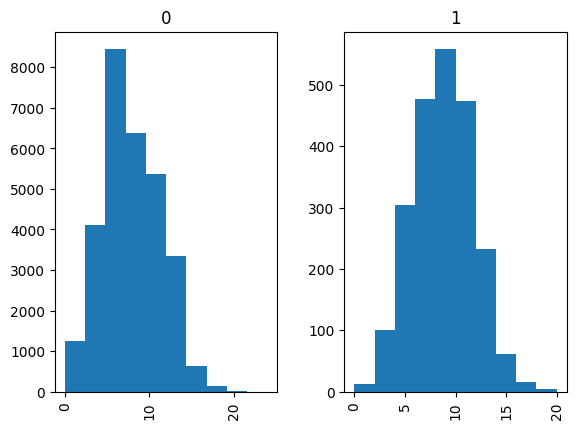

In [110]:
train.hist(column=['palavras'], by='label')
plt.show()

### Quantidade de cada "label"

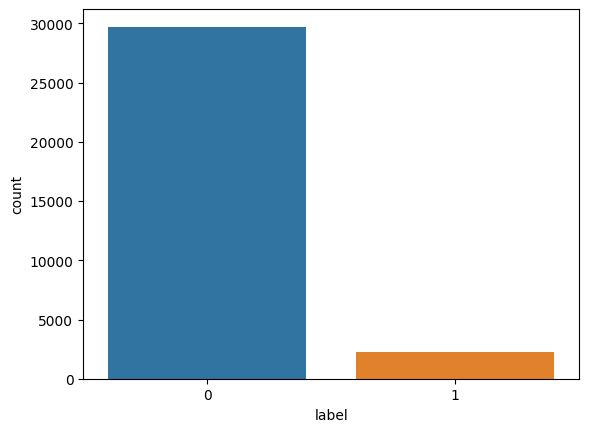

In [111]:
sns.countplot(x= 'label', data=train)
plt.show()

### Palavras frequêntes

#### Averiguar palavras mais frequêntes classificadas como "racistas ou sexistas"

In [112]:
lista_de_listas = train.loc[train['label']==1]['tweet'].values
lista_de_listas

array([list(['cnn', 'call', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot']),
       list(['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins']),
       list(['retweet', 'agree']), ...,
       list(['dont', 'ball', 'hashtag', 'say', 'weasel', 'away', 'lumpy', 'tony', 'dipshit']),
       list(['make', 'ask', 'anybody', 'god', 'oh', 'thank', 'god']),
       list(['sikh', 'temple', 'vandalise', 'calgary', 'wso', 'condemn', 'act'])],
      dtype=object)

In [113]:
palavras = [palavra for lista in lista_de_listas for palavra in lista]

In [114]:
len(palavras)

18596

In [115]:
import collections

In [116]:
def gera_freq_palavaras(lista):
  return collections.Counter(lista)

In [117]:
freq_palavras = gera_freq_palavaras(palavras)

In [118]:
len(freq_palavras)

5285

In [119]:
lista_de_palavras = []
lista_de_frequencias=[]
for palavra, frequencia in freq_palavras.items():
  lista_de_palavras.append(palavra)
  lista_de_frequencias.append(frequencia)

In [120]:
data_freq = pd.DataFrame({'palavra': lista_de_palavras, 'freq':lista_de_frequencias})

In [121]:
data_freq.sort_values(by='freq', ascending=False, inplace=True)

In [122]:
data_freq[:10]

,palavra,freq
49,amp,283
69,trump,216
33,white,153
98,libtard,149
65,black,146
26,like,141
168,racist,103
101,politics,97
18,say,96
43,people,95


In [123]:
dict(data_freq[:10].values)

{'amp': 283,
 'trump': 216,
 'white': 153,
 'libtard': 149,
 'black': 146,
 'like': 141,
 'racist': 103,
 'politics': 97,
 'say': 96,
 'people': 95}

### Nuvem de Palavras 

In [124]:
!pip install wordcloud
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


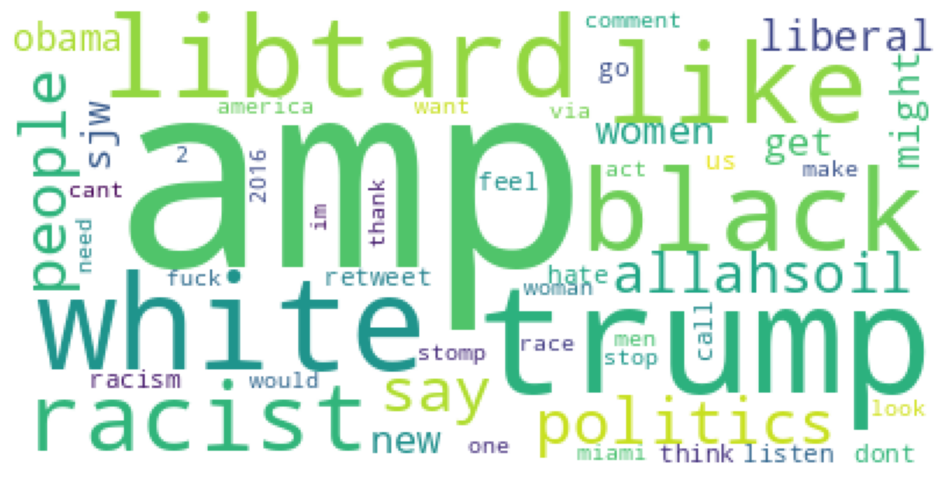

In [125]:
plt.figure(figsize=(12,8), dpi=100)
nuvem = WordCloud(background_color='white')
nuvem.generate_from_frequencies(dict(data_freq[:50].values))
plt.imshow(nuvem)
plt.axis('off')
plt.show()

### Retornar para formato de texto

In [126]:
train['tweet'][7]

['next',
 'school',
 'year',
 'year',
 'exams',
 'cant',
 'think',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl']

In [127]:
' '.join(train['tweet'][7])

'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl'

In [128]:
train['tweet'] = train['tweet'].apply(lambda x: ' '.join(x))

In [129]:
test['tweet'] = train['tweet'].apply(lambda x: ' '.join(x))

###  Solucionar problema de desequilibrio dos dados

In [130]:
train['label'].value_counts()


0    29720
1     2242
Name: label, dtype: int64

In [131]:
from sklearn.utils import resample

In [132]:
def equilibra_dados(train,pra_mais=True):
  train_minoria = train.loc[train['label']==1]
  train_maioria = train.loc[train['label']==0]
  if pra_mais:
    menor_pro_maior = resample(train_minoria, replace=True, n_samples=len(train_maioria), random_state=123)
    train_equilibrado = pd.concat([menor_pro_maior, train_maioria])
  else:
    maior_pro_menor = resample(train_maioria, replace=True, n_samples=len(train_minoria), random_state=123)
    train_equilibrado = pd.concat([maior_pro_menor, train_minoria])
  return train_equilibrado

In [133]:
len(train_equilibrado)

4484

In [134]:
train_equilibrado = equilibra_dados(train, pra_mais=True)

In [135]:
len(train_equilibrado)

59440

In [136]:
train_equilibrado['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

## Treinar Modelo

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = train_equilibrado['tweet']
y = train_equilibrado['label']

In [139]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=123)


In [140]:
X_train.shape, y_train.shape

((41608,), (41608,))

In [141]:
X_test.shape, y_test.shape

((17832,), (17832,))

In [142]:
sgd = Pipeline([
      ('countVector', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('modelo',SGDClassifier())
])

In [143]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('countVector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('modelo', SGDClassifier())])

In [144]:
sgd_pred = sgd.predict(X_test)
sgd_pred

array([0, 1, 1, ..., 1, 0, 1])

## Avaliar Performance do Modelo

In [145]:
from sklearn.metrics import f1_score

In [146]:
sgd_score = f1_score(y_test, sgd_pred)

In [147]:
sgd_score

0.9670863706648994

In [148]:
y_pred = sgd.predict(test['tweet'])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Submissão

In [150]:
submissao = pd.DataFrame({'id': test['id'], 'label':y_pred})

In [151]:
submissao.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [148]:
submissao.to_csv('pred_twitter.csv', index=False)

Fontes (em inglês):
* http://bit.ly/NLP-Twitter
* http://bit.ly/NLP-Twitter-Competition